In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('income.csv')


In [29]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [30]:
data.shape

(22, 3)

In [31]:
data.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [32]:
data=data.drop('Name', axis=1)

In [31]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

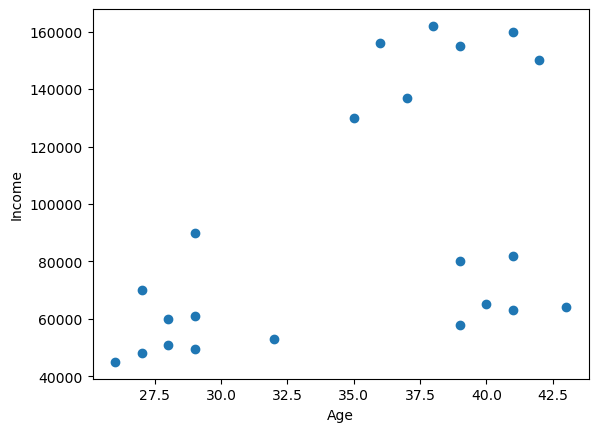

In [32]:
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [33]:
sse =[]
for k in range (1, len(data)):
    km= KMeans(n_clusters= k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

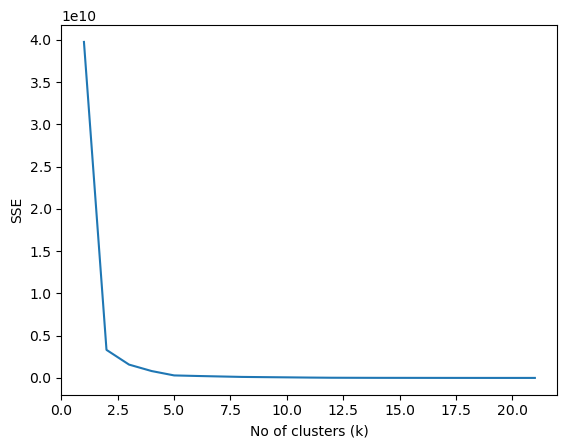

In [34]:
plt.xlabel('No of clusters (k)')
plt.ylabel('SSE')
plt.plot(range(1, len(data)), sse)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
data['Income($)'] = scaler.fit_transform(data[['Income($)']])
data['Age'] = scaler.fit_transform(data[['Age']])

In [37]:
data

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [38]:
km_model = KMeans(n_clusters= 3)
prediction = km_model.fit_predict(data[['Age', 'Income($)']])

In [39]:
km_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [40]:
data['clusters']= prediction
data

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [41]:
# separaring the clusters
df1 = data[data['clusters'] ==0]
df2 = data[data['clusters'] ==1]
df3 = data[data['clusters'] ==2]

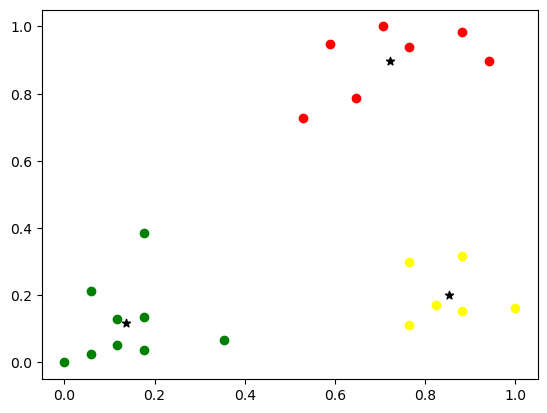

In [43]:
plt.scatter(df1['Age'], df1['Income($)'], color= 'red')
plt.scatter(df2['Age'], df2['Income($)'], color= 'green')
plt.scatter(df3['Age'], df3['Income($)'], color= 'yellow')

centers = km_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='*', color= 'black')

##  load Iris dataset

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
data= pd.DataFrame(iris.data, columns= iris.feature_names)
data['target']= iris.target

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], data['petal length (cm)'], data['petal width (cm)'])
plt.xlabel('')

In [15]:
sse =[]
for k in range (1,20):
    km= KMeans(n_clusters= k)
    km.fit(data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

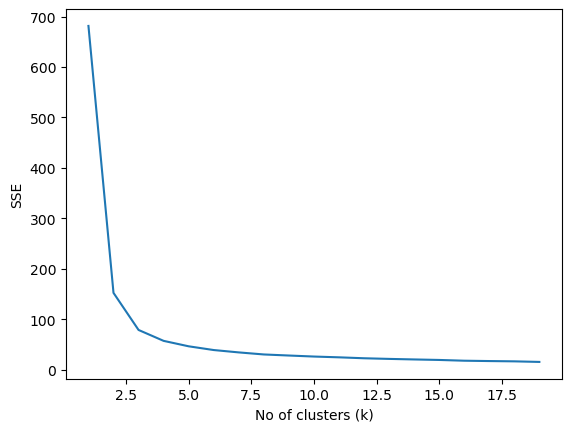

In [17]:
plt.xlabel('No of clusters (k)')
plt.ylabel('SSE')
plt.plot(range(1,20), sse)

In [19]:
km_model = KMeans(n_clusters= 3)
prediction = km_model.fit_predict(data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

In [20]:
km_model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [21]:
data['clusters']= prediction
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [22]:
d1 = data[data['clusters'] ==0]
d2 = data[data['clusters'] ==1]
d3 = data[data['clusters'] ==2]

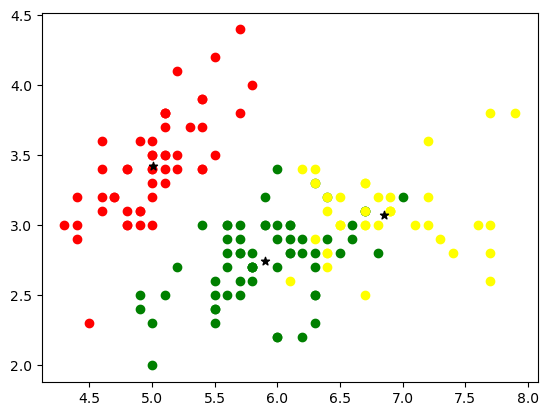

In [25]:
plt.scatter(d1['sepal length (cm)'], d1['sepal width (cm)'], color= 'red')
plt.scatter(d2['sepal length (cm)'], d2['sepal width (cm)'], color= 'green')
plt.scatter(d3['sepal length (cm)'], d3['sepal width (cm)'], color= 'yellow')

centers = km_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='*', color= 'black')